# Exploratory Data Analysis


## 1. Setup


### 1.1 Imports


In [1]:
from scripts.data_loader import load_data, split_features_targets
from scripts.preprocessing import preprocess_data
from scripts.plotting import (
    save_plots,
    plot_group_histogram,
    plot_group_boxplot,
    plot_group_line_chart,
    plot_group_spatial_heatmap,
    plot_spatial_heatmap,
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1.2 Loading Dataset


In [2]:
# Load data into DataFrames.
df = load_data("data")
df = preprocess_data(df)
print(f"📊 Data: \n {df.head()}\n")
features, targets = split_features_targets(df)
variables = [
    "air_temperature",
    "ocean_temperature",
    "bedrock_elevation",
    "precipitation",
    "ice_thickness",
    "ice_mask",
    "ice_velocity",
]
boundary_conditions = [
    "precipitation",
    "air_temperature",
    "ocean_temperature",
    "bedrock_elevation",
]

📊 Data: 
      x   y  bedrock_elevation  ice_thickness  ice_velocity  ice_mask  \
14 -11  25          -0.860659            0.0           0.0         4   
15 -10  25          -0.764656            0.0           0.0         4   
16  -9  25          -1.025466            0.0           0.0         4   
17  -8  25          -0.824427            0.0           0.0         4   
18  -7  25          -0.929027            0.0           0.0         4   

    precipitation  air_temperature  ocean_temperature  year  
14      -0.181050         0.782935          -0.034998  2015  
15      -0.199970         0.780229          -0.088588  2015  
16      -0.209756         0.778625          -0.129934  2015  
17      -0.191584         0.777997          -0.160890  2015  
18      -0.144087         0.778049          -0.185260  2015  



## 2. Feature Space


In [ ]:
for feature in variables:
    save_plots(df, f"out/images/{feature}", feature)

### 2.0 Data Descriptions


In [3]:
# Describe the data.
print(f"📊 Data description: \n {df.describe()}\n")

📊 Data description: 
                  x            y  bedrock_elevation  ice_thickness  \
count  194102.0000  194102.0000      194102.000000  194102.000000   
mean        0.0000       0.0000          -0.145281       0.169187   
std        13.4209      13.4209           0.538840       0.254005   
min       -25.0000     -25.0000          -1.118334       0.000000   
25%       -11.0000     -11.0000          -0.679946       0.000000   
50%         0.0000       0.0000           0.000000       0.000000   
75%        11.0000      11.0000           0.320054       0.355491   
max        25.0000      25.0000           1.051554       1.000000   

        ice_velocity       ice_mask  precipitation  air_temperature  \
count  194102.000000  194102.000000   1.941020e+05    194102.000000   
mean        7.023026       3.225830  -9.080586e-03         0.661321   
std        47.725853       0.957322   5.651494e-01         0.262183   
min         0.000000       2.000000  -8.442871e-01         0.000000   
2

### 2.1 NaN Values


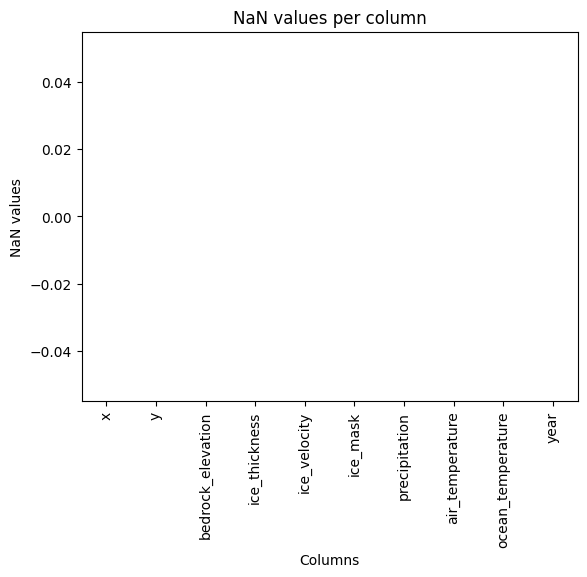

📊 NaN values per column: 
 x                    0
y                    0
bedrock_elevation    0
ice_thickness        0
ice_velocity         0
ice_mask             0
precipitation        0
air_temperature      0
ocean_temperature    0
year                 0
dtype: int64

📊 NaN values proportion per column: 
 x                    0.0
y                    0.0
bedrock_elevation    0.0
ice_thickness        0.0
ice_velocity         0.0
ice_mask             0.0
precipitation        0.0
air_temperature      0.0
ocean_temperature    0.0
year                 0.0
dtype: float64



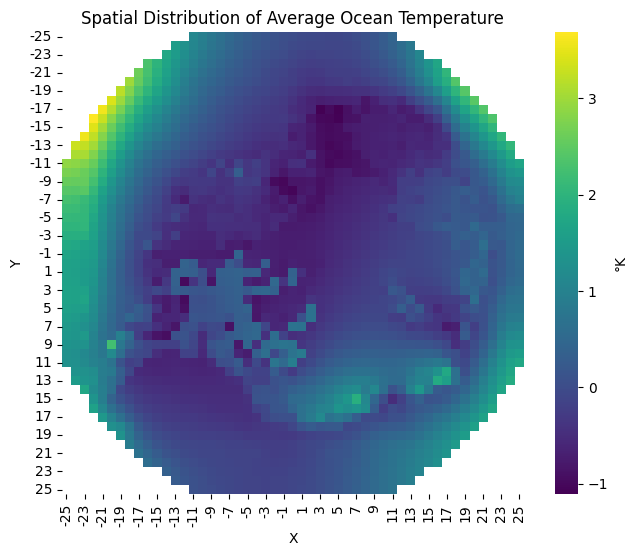

In [4]:
# Plot NaN values in each column
NaN_values = df.isna().sum()
sns.barplot(x=NaN_values.index, y=NaN_values.values)
plt.xticks(rotation=90)
plt.title("NaN values per column")
plt.xlabel("Columns")
plt.ylabel("NaN values")
plt.show()

print(f"📊 NaN values per column: \n {df.isna().sum()}\n")

# calculate each columns proportion of NaN values
NaN_proportion = df.isna().sum() / len(df)
print(f"📊 NaN values proportion per column: \n {NaN_proportion}\n")

# Plot a heatmap of NaN values
plot_spatial_heatmap(df, "ocean_temperature")

### 2.2 Outliers


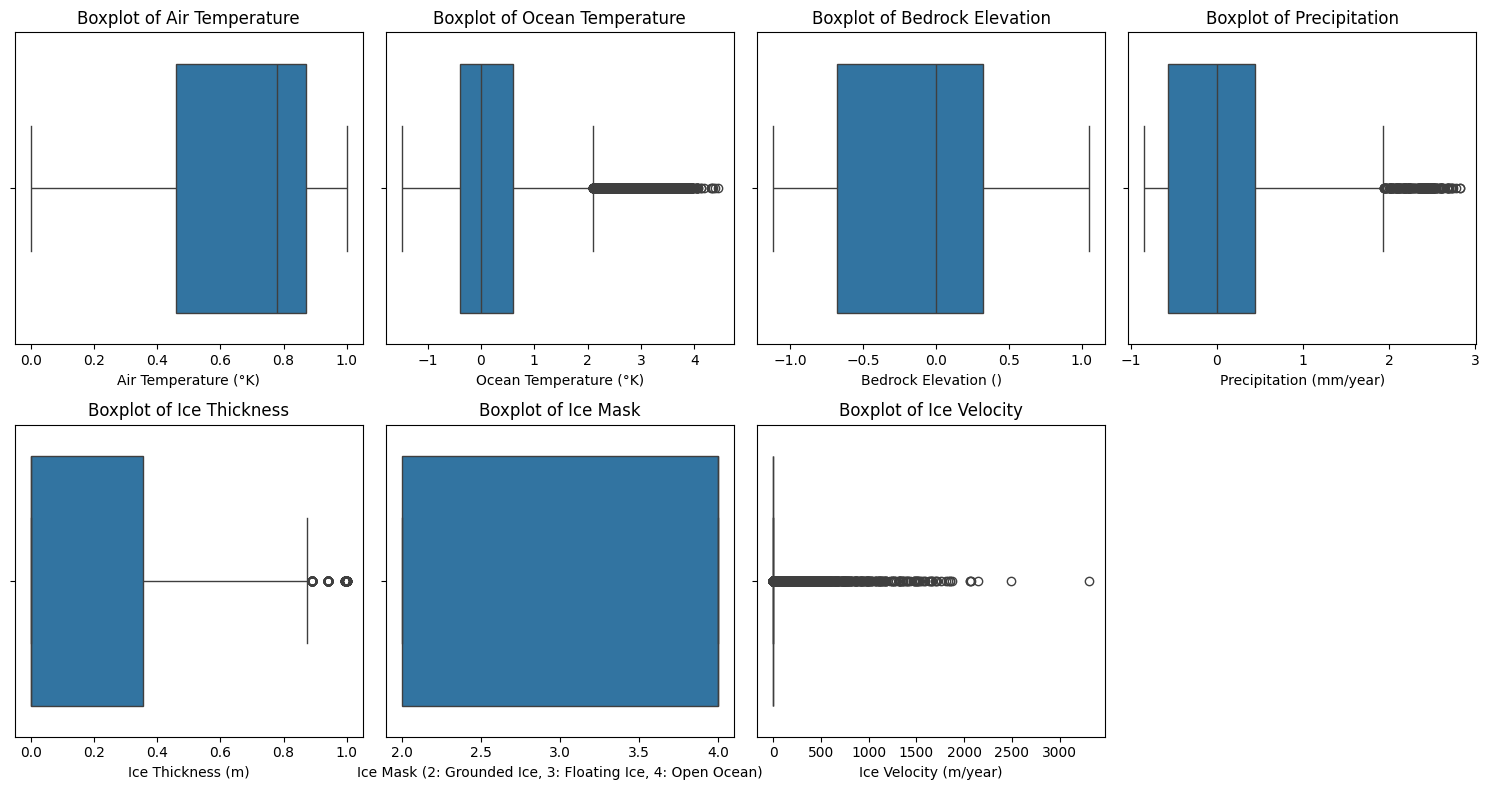

In [6]:
plot_group_boxplot(df, variables, 2, 4)

### 2.3 Duplicates


In [5]:
print(f"📊 Duplicates: {df.duplicated().sum()}")

📊 Duplicates: 0


### 2.4 Univariate Analysis


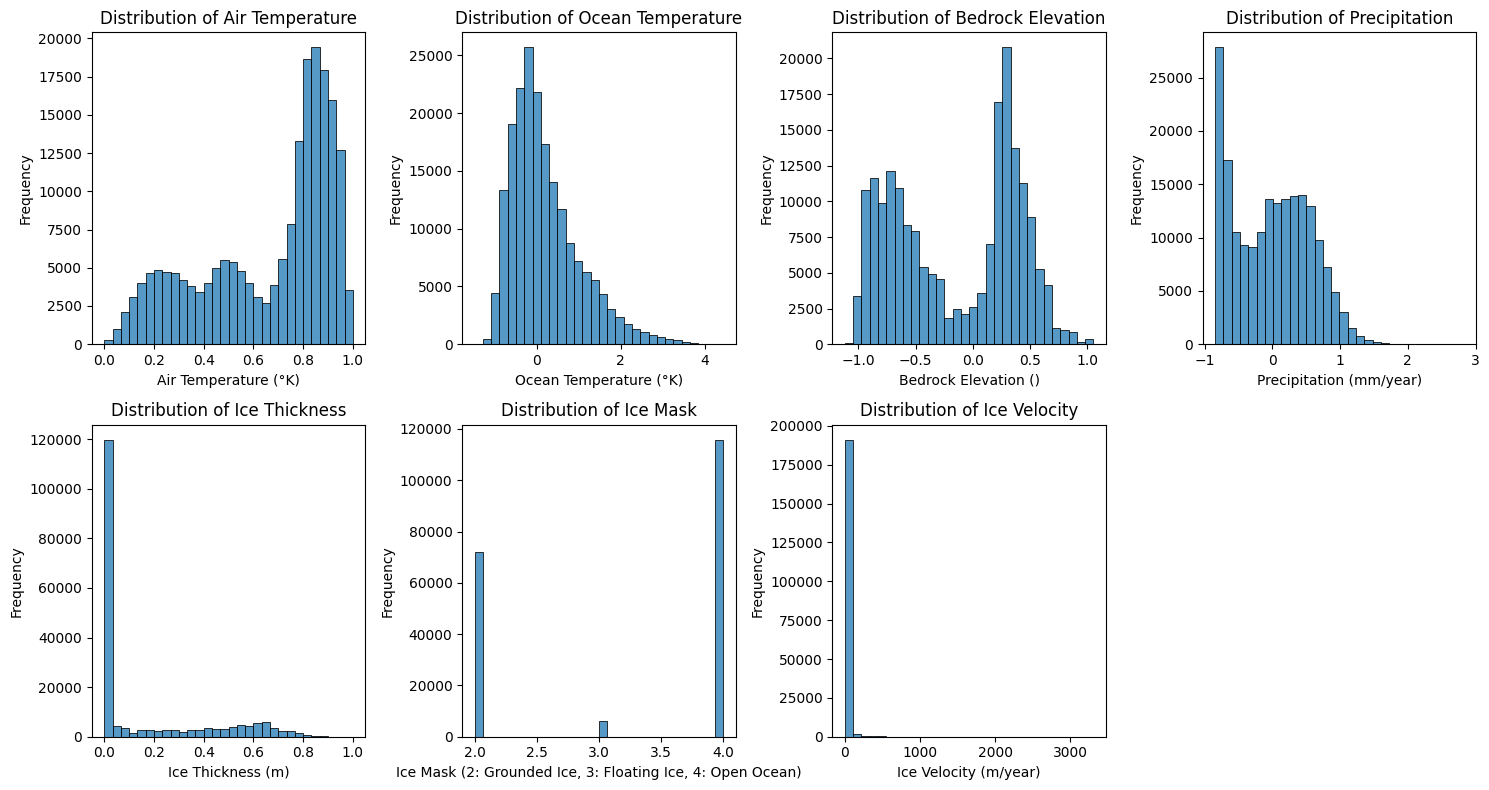

In [6]:
plot_group_histogram(df, variables, 2, 4)

### 2.5 Static Spatial Representations


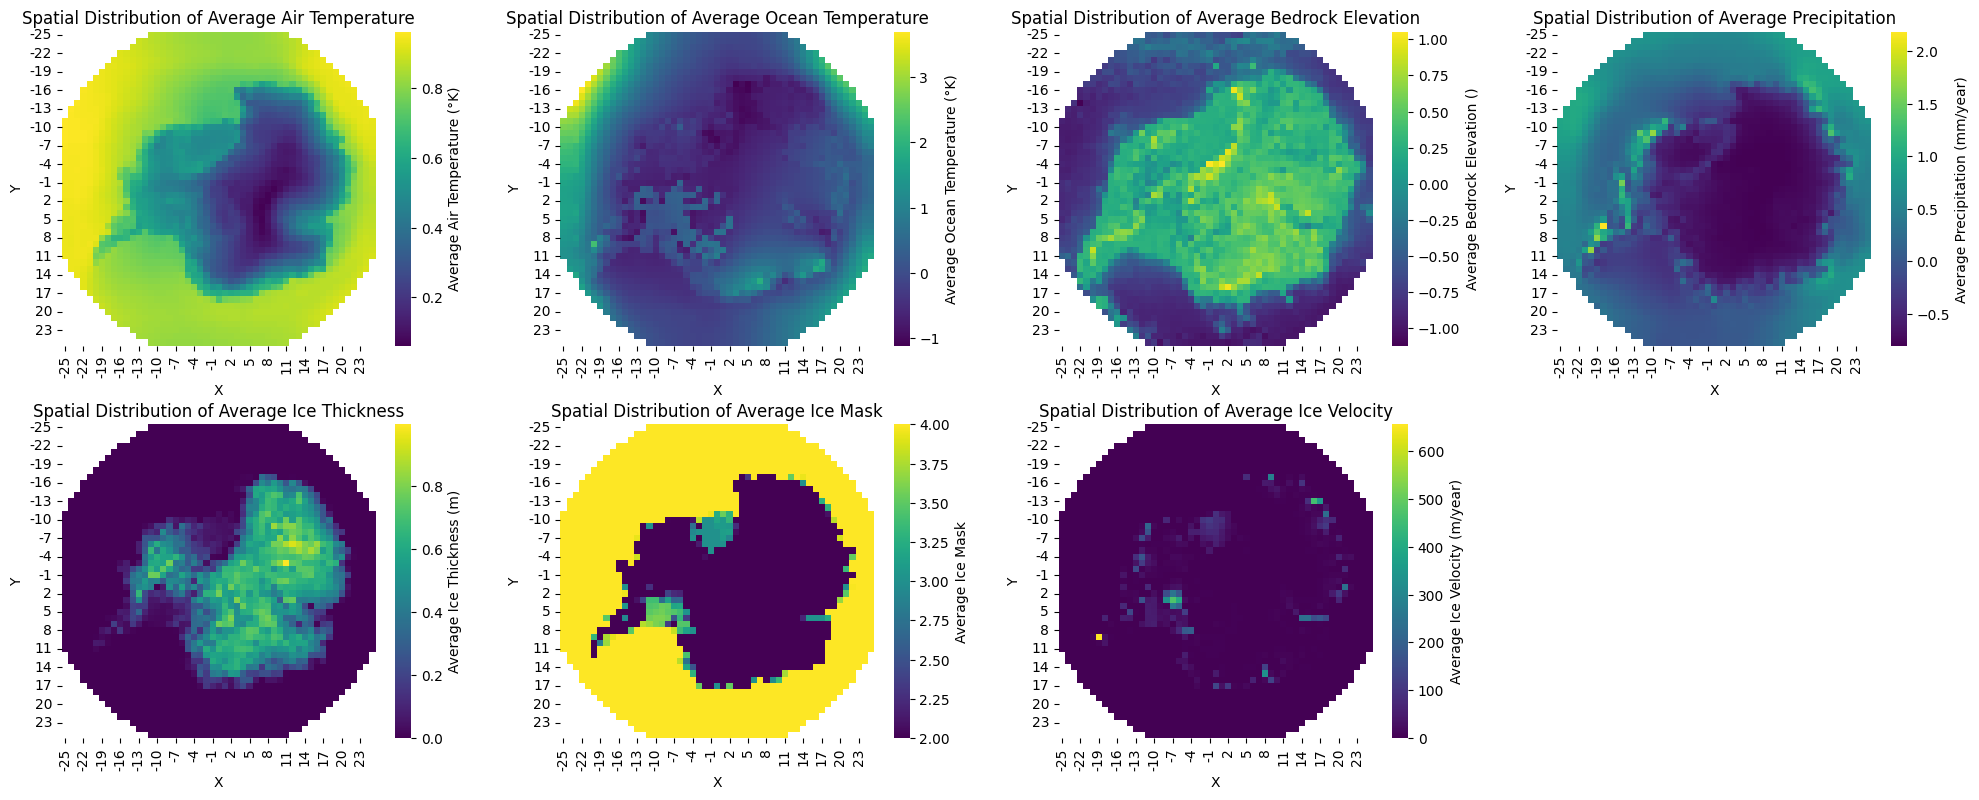

In [8]:
plot_group_spatial_heatmap(df, variables, 2, 4)

### 2.6 Dynamic Spatial Representations


### 2.7 Temporal Representations


In [ ]:
plot_group_line_chart(df, variables, 2, 3)

## 3. Correlation Analysis


In [ ]:
# Plot a correlation matrix
corr = df[variables].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation matrix")
plt.show()

## 4. Feature Engineering


### 3.2 Feature Creation


In [9]:
created_features = []

# Bedrock below Sea Level
df["bedrock_below_sea_level"] = df["bedrock_elevation"] < 0
created_features.append("bedrock_below_sea_level")



# Distance to Pole


df["dtp"] = np.sqrt((df["x"] - 4) ** 2 + df["y"] ** 2)
created_features.append("dtp")



# Rolling Standard Deviation


for feature in ["precipitation", "air_temperature"]:

    df[f"{feature}_rolling_std"] = df[feature].rolling(window=3).std()

    created_features.extend([f"{feature}_rolling_std"])



# Log Transformation of air_temperature

df["log_air_temperature"] = np.log(df["air_temperature"] + 1)

created_features.append("log_air_temperature")



# Coastline Encoding

df["coastline"] = 0

for index, row in df.iterrows():

    if row["ice_mask"] == 2:

        x = row["x"]

        y = row["y"]
        if (

            ((df["x"] == x) & (df["y"] == y + 1) & (df["ice_mask"] == 4)).any()

            or ((df["x"] == x) & (df["y"] == y - 1) & (df["ice_mask"] == 4)).any()

            or ((df["x"] == x + 1) & (df["y"] == y) & (df["ice_mask"] == 4)).any()

            or ((df["x"] == x - 1) & (df["y"] == y) & (df["ice_mask"] == 4)).any()

        ):
            df.at[index, "coastline"] = 1
created_features.append("coastline")

### 3.3 Created Feature Analysis


    bedrock_below_sea_level        dtp  precipitation_rolling_std  \
14                     True  29.154759                        NaN   
15                     True  28.653098                        NaN   
16                     True  28.178006                   0.014593   
17                     True  27.730849                   0.009095   
18                     True  27.313001                   0.033908   

    air_temperature_rolling_std  log_air_temperature  coastline  
14                          NaN             0.578261          0  
15                          NaN             0.576742          0  
16                     0.002178             0.575841          0  
17                     0.001151             0.575488          0  
18                     0.000348             0.575517          0  


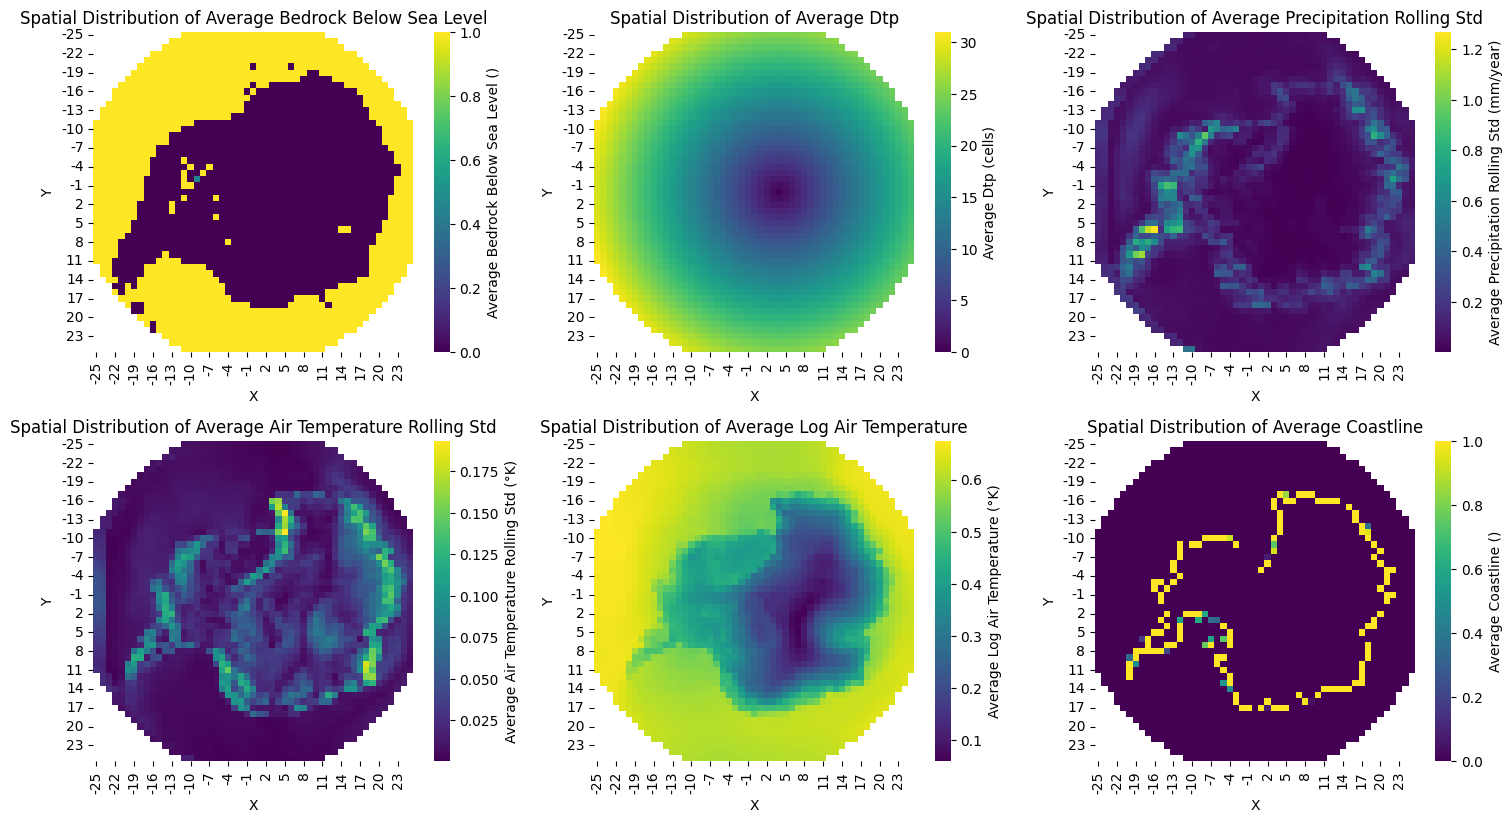

In [10]:
df_created = df[created_features]
print(df_created.head())
plot_group_spatial_heatmap(df, created_features, 4, 3)

### 3.4 Created Feature Correlation Analysis


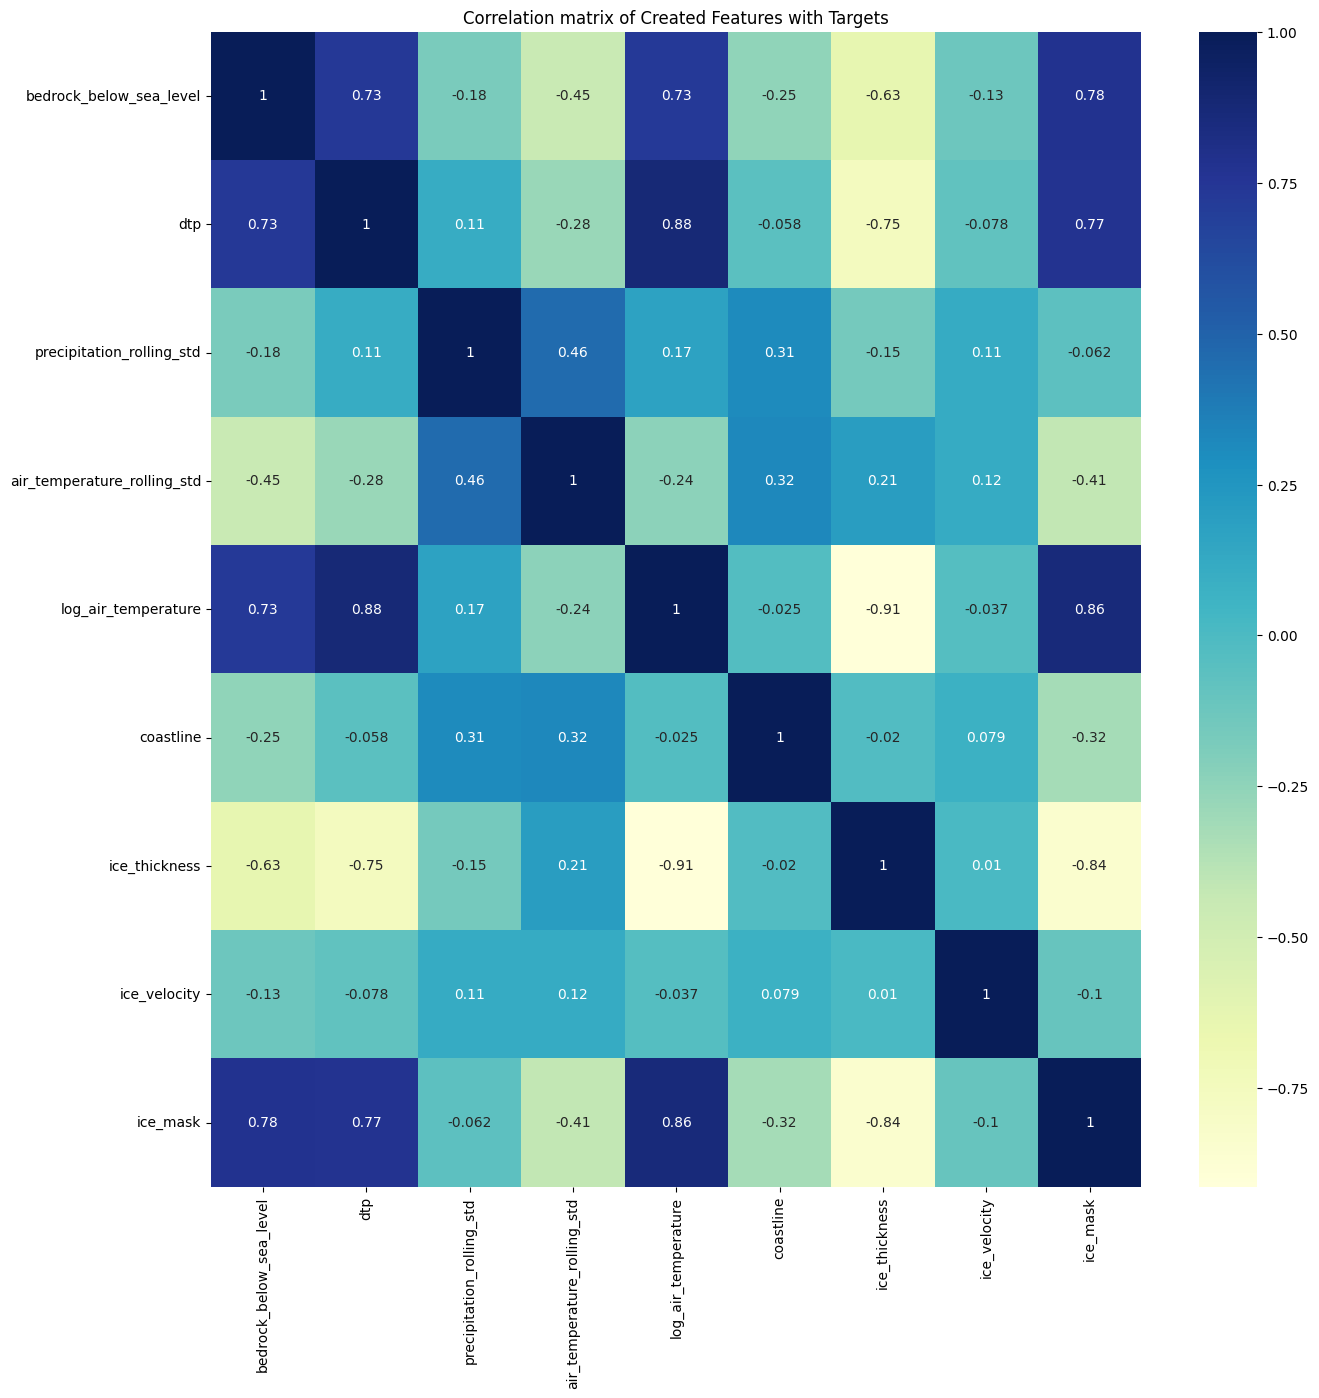

In [11]:
created_with_targets = created_features + targets.columns.tolist()
corr = df[created_with_targets].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation matrix of Created Features with Targets")
plt.show()